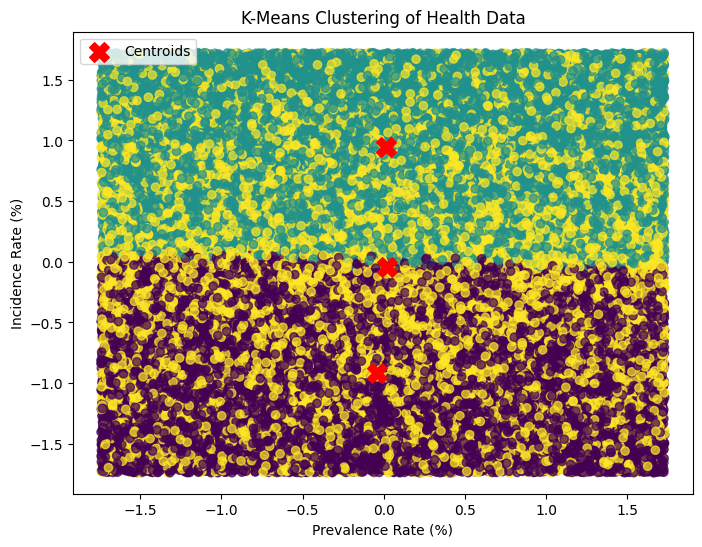

Cluster
2    22469
1    19073
0    18596
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = r"D:\weka dataset\ML_dataset3.xlsx"  
data = pd.read_excel(file_path)

X = data[['Prevalence Rate (%)', 'Incidence Rate (%)', 'Healthcare Access (%)', 
          'Doctors per 1000', 'Hospital Beds per 1000']]

X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel("Prevalence Rate (%)")
plt.ylabel("Incidence Rate (%)")
plt.title("K-Means Clustering of Health Data")
plt.legend()
plt.show()

print(data['Cluster'].value_counts())
